# 目次
-  [ユニバーサル関数（ufunc）](#ユニバーサル関数（ufunc）)
- [ndarrayにおけるaxisとは](#ndarrayにおけるaxisとは)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# jupyter notebookに画像を表示
%matplotlib inline

## ユニバーサル関数（ufunc）
Numpyでは、三角関数(np.sinなど）や指数関数（np.exp）のような関数は**ユニバーサル関数オブジェクト（略すとufunc）**になっています。  
[公式ドキュメント](https://docs.scipy.org/doc/numpy/reference/ufuncs.html)によると、
- 要素ごと（element-by-element）にndarrayへ作用する関数  
- コンパイルされたC言語で実装されている

といったことが書かれています。

In [2]:
type(np.sin)

numpy.ufunc

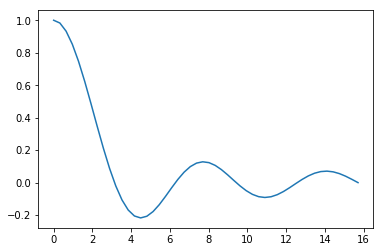

In [3]:
x = np.linspace(0.001, 5 * np.pi)
plt.plot(x, np.sin(x) / x)

ufuncは、Pythonのループの遅さという欠点を補うために生まれました。  
比較してみましょう。

In [4]:
t = np.linspace(0, 1, 1000)

In [5]:
%%timeit
for _t in t:
    np.sin(_t)

1.36 ms ± 68.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [6]:
%%timeit
np.sin(t)

7.81 µs ± 445 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


少なくとも100倍以上は速くなっています。  
なるべく配列を一気にufuncに投げるようにしましょう。

In [7]:
# 平方根
np.sqrt([0, 2, 3, 5, 9])

array([0.        , 1.41421356, 1.73205081, 2.23606798, 3.        ])

In [8]:
# 自然対数
np.log([1, np.e, np.e**2])

array([0., 1., 2.])

In [9]:
# 底が10
np.log10([0.0001, 1.e-100, 1, 10, 100])

array([  -4., -100.,    0.,    1.,    2.])

In [10]:
# ラジアンから度への変換
np.rad2deg(np.linspace(0, np.pi, 10))

array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.])

In [11]:
# 度からラジアンへの変換
np.deg2rad(np.linspace(0, 180, 10)) / np.pi

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

ufuncはとても数が多いので、[公式HP](https://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs)の下の方を参照してください。

## ufuncにおけるaxisとは
ufuncで度々出てくるのが「axis（軸）」です。慣れていないと混乱することもあると思うので説明します。  
[ここ](http://using-python-in-research.site44.com/numpy-mpl-args)に分かりやすい画像がありましたので引用します。配列の軸の方向が矢印で書かれています。

<img  src="axis.png"/>

例えばndarray.sum関数は、引数にaxisを取ります。この場合のaxisは「和を取る方向」を意味しています。

In [12]:
A = np.arange(6).reshape(3, 2)
A

array([[0, 1],
       [2, 3],
       [4, 5]])

In [13]:
A.sum(axis=0) # 縦方向の和

array([6, 9])

In [14]:
A.sum(axis=1) # 横方向の和

array([1, 5, 9])

In [15]:
A.sum() # 全要素の和

15

上の結果を見てもらえると分かるように、axis=0やaxis=1である軸について和を取ると次元が１つ落ちます。  
axisを指定しないとスカラーまで次元が落ちます。このように特定の軸について次元を落とす操作を**Reduction**といいます。    
axis=0でReductionを行うと、shapeが(n, m)が (m,)になります。  
axisは、潰す軸を指定すると考えると忘れないと思います。  

引数にaxisを取るndarrayの主な関数の表がこちらです。より詳細に知りたい方は[ここ](https://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html#calculation)を見てください。    

|関数名|説明|
|:------:|:--:|
|sum|和|
|max|最大値|
|min|最小値|
|argmax|最大値を取るインデックス|
|argmin|最小値を取るインデックス|
|cumsum|累積和|
|mean|平均値|
|var|分散|
|std|標準偏差|
|all|全てTrueならTrue|
|any|一つでもTrueがあればTrue|



累積和を使うと、ランダムウォークを一行で書くこともできます。

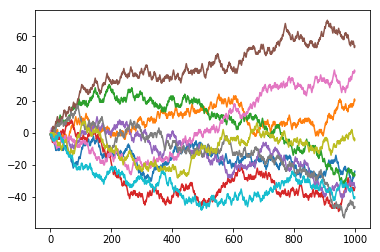

In [16]:
plt.plot(np.random.choice([-1, 1], size=(1000, 10)).cumsum(axis=0))
plt.show()